<a href="https://colab.research.google.com/github/Oluwills/Biscuit-Product-Sales-Data/blob/main/Health_Care_Sample_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
url = 'https://raw.githubusercontent.com/Oluwills/Health-Care-Data-Sample/main/Health%20Care%20Data%20Sample.csv'
df = pd.read_csv(url)
HealthCare = pd.read_csv(url)
HealthCare.head(12)

,month,share interest,unemployment index,share price
0,1,2.00,5.9,1075
1,2,2.00,5.7,1130
2,3,2.25,5.6,1167
3,4,2.25,5.5,1159
4,5,2.25,5.5,1195
5,6,2.50,5.5,1234
6,7,2.50,5.6,1254
7,8,2.50,5.4,1256
8,9,2.50,5.3,1293
9,10,2.50,5.3,1357


In [11]:
missing_values = df.isnull().sum()

print("Missing values in the dataset:")
print(missing_values)

Missing values in the dataset:
month                 0
share interest        0
unemployment index    0
share price           0
dtype: int64


   month  share interest  unemployment index  share price
0      1            2.00                 5.9         1075
1      2            2.00                 5.7         1130
2      3            2.25                 5.6         1167
3      4            2.25                 5.5         1159
4      5            2.25                 5.5         1195


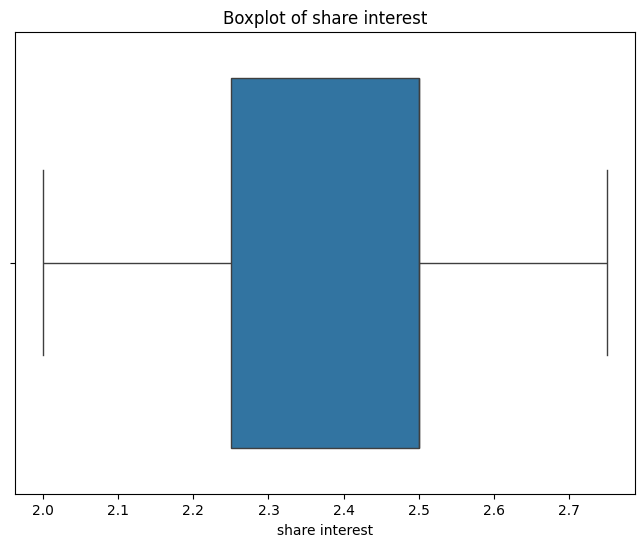


Summary Statistics for share interest:
count    12.000000
mean      2.375000
std       0.226134
min       2.000000
25%       2.250000
50%       2.500000
75%       2.500000
max       2.750000
Name: share interest, dtype: float64

Outliers for share interest:
Empty DataFrame
Columns: [month, share interest, unemployment index, share price]
Index: []


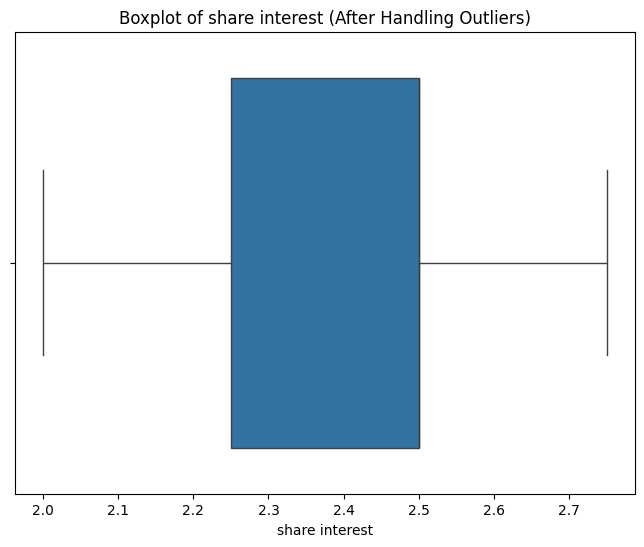

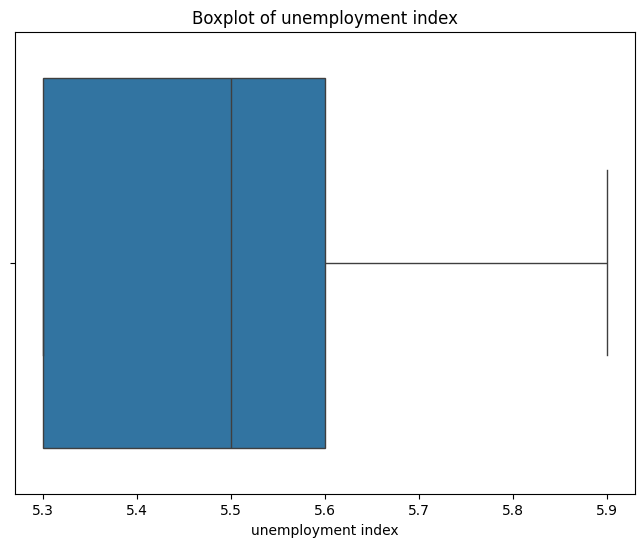


Summary Statistics for unemployment index:
count    12.000000
mean      5.491667
std       0.188092
min       5.300000
25%       5.300000
50%       5.500000
75%       5.600000
max       5.900000
Name: unemployment index, dtype: float64

Outliers for unemployment index:
Empty DataFrame
Columns: [month, share interest, unemployment index, share price]
Index: []


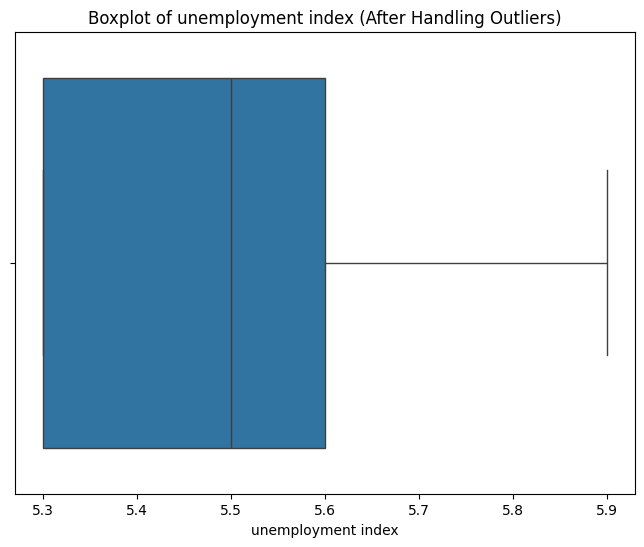

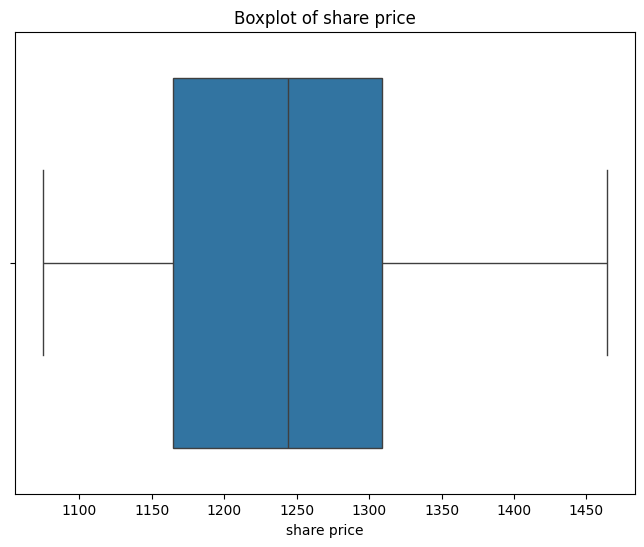


Summary Statistics for share price:
count      12.000000
mean     1248.166667
std       114.144114
min      1075.000000
25%      1165.000000
50%      1244.000000
75%      1309.000000
max      1464.000000
Name: share price, dtype: float64

Outliers for share price:
Empty DataFrame
Columns: [month, share interest, unemployment index, share price]
Index: []


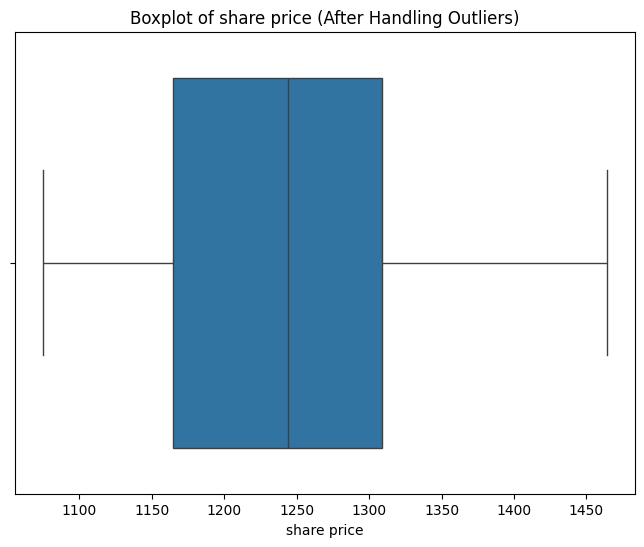

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/Oluwills/Health-Care-Data-Sample/main/Health%20Care%20Data%20Sample.csv"
df = pd.read_csv(url)

print(df.head())

for col in df.columns[1:]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(f'{col}')
    plt.show()

    summary_stats = df[col].describe()
    print(f"\nSummary Statistics for {col}:")
    print(summary_stats)

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nOutliers for {col}:")
    print(outliers)

    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} (After Handling Outliers)')
    plt.xlabel(f'{col}')
    plt.show()


In [20]:
import pandas as pd

url = "https://raw.githubusercontent.com/Oluwills/Health-Care-Data-Sample/main/Health%20Care%20Data%20Sample.csv"
df = pd.read_csv(url)
print("\nData Types:")
print(df.dtypes)
print(df.isnull().sum())



Data Types:
month                   int64
share interest        float64
unemployment index    float64
share price             int64
dtype: object
month                 0
share interest        0
unemployment index    0
share price           0
dtype: int64


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
url = "https://raw.githubusercontent.com/Oluwills/Health-Care-Data-Sample/main/Health%20Care%20Data%20Sample.csv"
df = pd.read_csv(url)
X = df[['unemployment index']]
y = df['share price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 2431.779071062551
Coefficients: [-570.82089552]
Intercept: 4372.283582089555


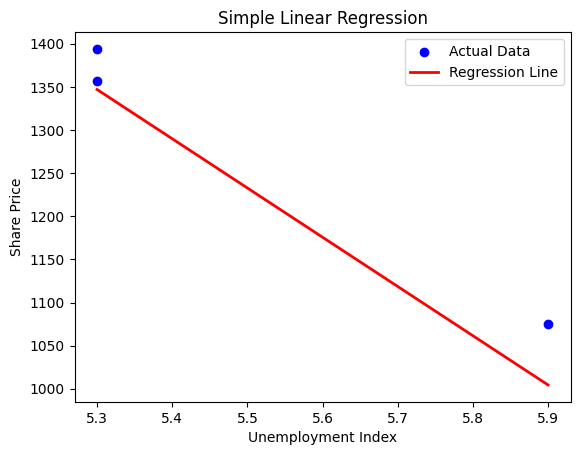

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
url = "https://raw.githubusercontent.com/Oluwills/Health-Care-Data-Sample/main/Health%20Care%20Data%20Sample.csv"
df = pd.read_csv(url)
X = df[['unemployment index']]
y = df['share price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Simple Linear Regression')
plt.xlabel('Unemployment Index')
plt.ylabel('Share Price')
plt.legend()
plt.show()


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

url = "https://raw.githubusercontent.com/Oluwills/Health-Care-Data-Sample/main/Health%20Care%20Data%20Sample.csv"
df = pd.read_csv(url)
X = df[['share interest', 'unemployment index']]
y = df['share price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 3888.2233994207763
Coefficients: [ 343.2        -141.82089552]
Intercept: 1197.6835820895535


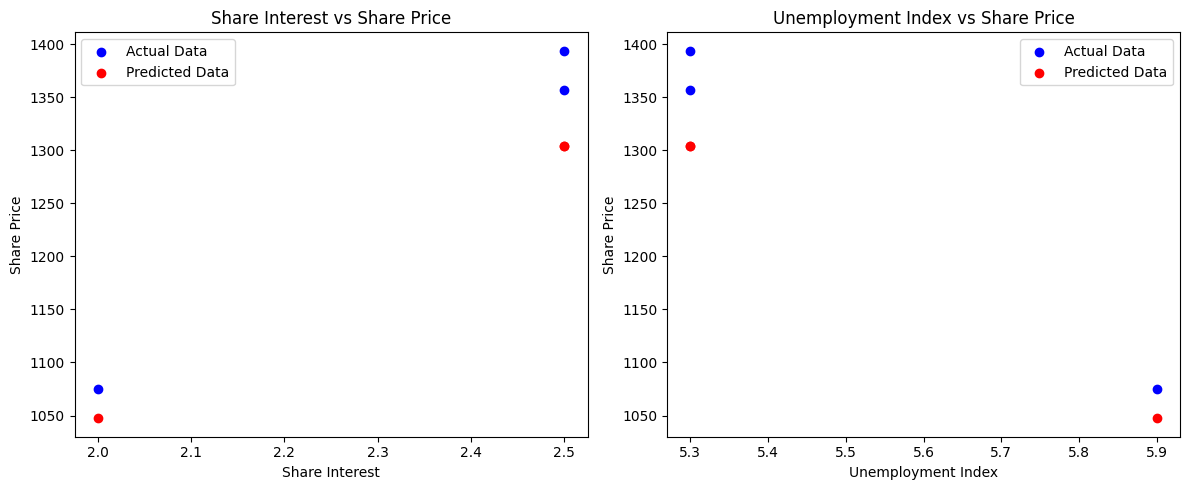

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
url = "https://raw.githubusercontent.com/Oluwills/Health-Care-Data-Sample/main/Health%20Care%20Data%20Sample.csv"
df = pd.read_csv(url)
X = df[['share interest', 'unemployment index']]
y = df['share price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(X_test['share interest'], y_test, color='blue', label='Actual Data')
axs[0].scatter(X_test['share interest'], y_pred, color='red', label='Predicted Data')
axs[0].set_title('Share Interest vs Share Price')
axs[0].set_xlabel('Share Interest')
axs[0].set_ylabel('Share Price')
axs[0].legend()
axs[1].scatter(X_test['unemployment index'], y_test, color='blue', label='Actual Data')
axs[1].scatter(X_test['unemployment index'], y_pred, color='red', label='Predicted Data')
axs[1].set_title('Unemployment Index vs Share Price')
axs[1].set_xlabel('Unemployment Index')
axs[1].set_ylabel('Share Price')
axs[1].legend()

plt.tight_layout()
plt.show()
